In [150]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [151]:
from proj1_helpers import *
from toolbox import *
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
init_y, init_x, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=False)
init_y = (init_y + 1.0) * 0.5

num_samples = x.shape[0]

In [152]:
def cropped_of_rows_with_999_value(x, y):
    for i in range(x.shape[1]):
        idxes = (x[:, i] != -999)
        x = x[idxes]
        y = y[idxes]
    return x, y

def columns_with_999_value(x):
    indexes = []
    for i in range(x.shape[1]):
        if np.any(x[:, i] == -999.0):
            indexes.append(i)
    return indexes

def cropped_of_columns(x, columns_indexes):
    return np.delete(x, columns_indexes, axis = 1)

def augment(x, n):
    return x if n == 1 else np.append(augment(x, n - 1), x ** n, axis = 1)

In [174]:
rem_indexes = columns_with_999_value(init_x) # []
rem_indexes.remove(0)

# Comment one of the two (first one deletes columns, second one deletes rows)
#x, y = cropped_of_columns(init_x, rem_indexes), init_y
x, y = cropped_of_rows_with_999_value(init_x, init_y)

x = augment(x, 6)

tx, mean, var = standardize(x)

print(tx.shape)

(68114, 181)


## Do your thing crazy machine learning thing here :) ...

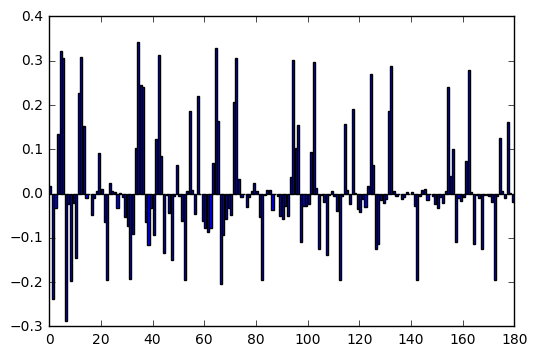

In [175]:
def plot_feature_to_output_correlations(tx, y):
    feature_count = tx.shape[1]

    corrs = np.zeros(feature_count)
    for i in range(feature_count):
        x = tx[:, i]
        corrs[i] = np.corrcoef(x, y)[0][1]

    fig, ax = plt.subplots()
    width = 0.5

    ax.bar(np.arange(feature_count), corrs)

plot_feature_to_output_correlations(x, y)

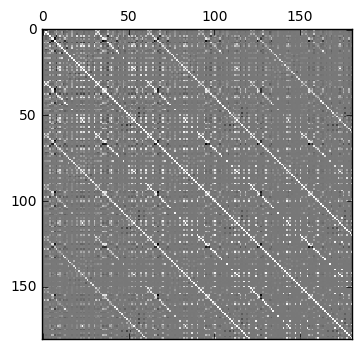

In [176]:
G = tx.T @ tx
plt.matshow(G, cmap=plt.cm.gray)

In [220]:
loss, w = logistic_regression(y, tx, np.zeros(tx.shape[1]), 0.05, 1000)
y_pred_train = logistfun(tx @ w)

print (w)

y_pred_train[y_pred_train <  0.5] = 0
y_pred_train[y_pred_train >= 0.5] = 1

np.count_nonzero(y_pred_train == y) / len(y)

[ -2.30248227e-01   5.17876674e-01  -2.17779625e-01   3.59472290e-01
   3.53846707e-01  -1.48112151e-01   1.52327182e-01  -2.35210054e-02
   6.98598651e-01  -2.30236488e-01   9.89016987e-02  -2.21343519e-01
   1.98067749e-01   6.46747180e-02   3.82570441e-01  -7.18163107e-03
   1.61402719e-03   1.93065001e-01  -1.58177973e-02  -4.50202558e-03
   2.37709970e-01   2.20819734e-02  -1.43858640e-01  -3.06995178e-02
  -8.89704678e-02  -8.14934157e-03  -1.00925622e-02   1.42032431e-01
   1.13678950e-02  -9.17787170e-03  -3.72436441e-02  -4.22394594e-01
  -2.38181736e-01  -4.10996551e-01   1.34316465e-01   1.06659797e-01
   1.64389499e-01   1.24299947e-01   2.02111160e-01   7.43915773e-02
  -7.94847740e-03  -4.30748597e-02   1.54497386e-01   1.09449121e-01
  -4.17483657e-02  -1.15970213e-01  -6.35426188e-03   4.92593081e-02
  -1.35131553e-01   3.17310429e-03   2.33718417e-02  -4.48313412e-03
  -1.24303850e-01  -3.06995178e-02  -1.31885426e-01   1.18433363e-01
   1.11592932e-02  -2.44052883e-02

0.7648647855066506

## Generate predictions and save ouput in csv format for submission:

In [157]:
DATA_TEST_PATH = 'test.csv' # TODO: download train data and supply path here 
_, init_x_test, ids_test = load_csv_data(DATA_TEST_PATH)

x_test = cropped_of_columns(init_x_test, rem_indexes)
x_test = augment(x_test, 4)
tx_test, _, _ = standardize(x_test, mean, var)

print(tx_test.shape)

(568238, 77)


In [158]:
OUTPUT_PATH = 'out.csv' # TODO: fill in desired name of output file for submission
y_pred = logistfun(tx_test @ w)

y_pred[np.where(y_pred <  0.5)] = -1
y_pred[np.where(y_pred >= 0.5)] = 1

create_csv_submission(ids_test, y_pred, OUTPUT_PATH)